In [51]:
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [52]:
df_aw_custs = pd.read_csv('./AdvWorksCusts.csv')
df_aw_bike_buyer = pd.read_csv('./AW_BikeBuyer.csv')

In [53]:
print(df_aw_custs.head())
print(df_aw_bike_buyer.head())

   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

       ...        BirthDate   Education    Occupation Gender MaritalStatus  \
0      ...       1966-04-08  Bachelors   Professional      M             M   
1      ...       1965-05-14  Bachelors   Professional   

In [54]:
print(df_aw_bike_buyer.describe())
print(df_aw_bike_buyer.shape)
print(df_aw_bike_buyer.CustomerID.unique().shape)

         CustomerID     BikeBuyer
count  16519.000000  16519.000000
mean   20234.225195      0.332284
std     5342.515987      0.471046
min    11000.000000      0.000000
25%    15604.500000      0.000000
50%    20221.000000      0.000000
75%    24860.500000      1.000000
max    29482.000000      1.000000
(16519, 2)
(16404,)


In [55]:
df_aw_bike_buyer.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

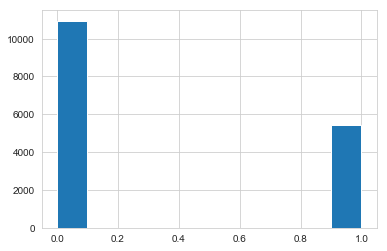

In [56]:
df_aw_bike_buyer.BikeBuyer.hist()

In [57]:
df_aw_custs.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

In [58]:
df_aw_custs[["YearlyIncome", "Occupation"]].groupby("Occupation").median()

YearlyIncome
Occupation                  
Clerical             49481.0
Management          118781.0
Manual               21722.0
Professional         99058.0
Skilled Manual       66471.5

In [59]:
print(df_aw_custs.head())
print(df_aw_bike_buyer.head())
df_aw_custs.set_index("CustomerID", inplace=True)
df_aw_bike_buyer.set_index("CustomerID", inplace=True)
df_joined = df_aw_custs.join(df_aw_bike_buyer)

   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

       ...        BirthDate   Education    Occupation Gender MaritalStatus  \
0      ...       1966-04-08  Bachelors   Professional      M             M   
1      ...       1965-05-14  Bachelors   Professional   

In [60]:
print(df_joined.columns)
df_joined.dtypes


Index(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BikeBuyer'],
      dtype='object')


Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
BikeBuyer                int64
dtype: object

## Process age

In [61]:
def age_group(age):
    if age < 25:
        return "<25"
    elif age < 45:
        return "25-45"
    elif age < 55:
        return "45-55"
    else:
        return ">=55"

In [147]:
def process_age(data):
    data["Age"] = (pd.Timestamp("1998-01-01") - pd.to_datetime(data["BirthDate"])).astype('<m8[Y]').astype("int")
    data["AgeGroup"] = data["Age"].map(age_group)

In [63]:
process_age(df_joined)

In [64]:
df_joined[["AgeGroup", "YearlyIncome", "Gender"]].groupby(["AgeGroup", "Gender"]).sum()

YearlyIncome
AgeGroup Gender              
25-45    F          373948270
         M          456649818
45-55    F           90333213
         M          108529588
<25      F           74554966
         M           89257171
>=55     F           39993904
         M           48372216

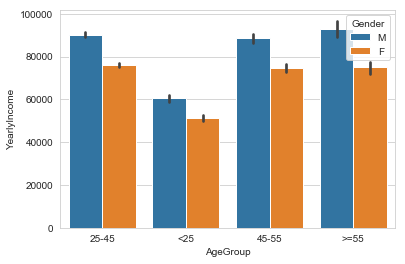

In [65]:
sns.barplot(data=df_joined[["AgeGroup","YearlyIncome", "Gender"]], y="YearlyIncome", x="AgeGroup", hue="Gender")

In [66]:
def plot_box(data, cols_y, col_x = 'BikeBuyer', hue = "BikeBuyer"):
    for col_y in cols_y:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col_y, data=data, palette='RdBu_r', hue = hue)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        

In [67]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

In [68]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [69]:
print(df_joined.head())
print(df_joined.columns)


           Title  FirstName MiddleName LastName Suffix         AddressLine1  \
CustomerID                                                                    
11000        NaN        Jon          V     Yang    NaN      3761 N. 14th St   
11001        NaN     Eugene          L    Huang    NaN           2243 W St.   
11002        NaN      Ruben        NaN   Torres    NaN     5844 Linden Land   
11003        NaN    Christy        NaN      Zhu    NaN     1825 Village Pl.   
11004        NaN  Elizabeth        NaN  Johnson    NaN  7553 Harness Circle   

           AddressLine2         City StateProvinceName CountryRegionName  \
CustomerID                                                                 
11000               NaN  Rockhampton        Queensland         Australia   
11001               NaN      Seaford          Victoria         Australia   
11002               NaN       Hobart          Tasmania         Australia   
11003               NaN   North Ryde   New South Wales         Aus

In [70]:
labels = np.array(df_joined['BikeBuyer'])

## Translating features to numpy array

In [151]:
def build_features_array(data, enc_cols, no_enc_cols):
    features = np.empty((len(data),0))
    print(features.shape)
    for col in enc_cols:
        encoded = encode_string(data[col])
        features = np.concatenate([features, encoded], axis = 1)
        print(features.shape)
    features = np.concatenate([features, np.array(data[no_enc_cols])], axis = 1)
    print(features.shape)
    return features

In [152]:
enc_cols = ['MaritalStatus', 'Gender', 'Occupation']
no_enc_cols = ["YearlyIncome", "Age", "NumberChildrenAtHome"]
Features = build_features_array(df_joined, enc_cols, no_enc_cols)


(16404, 0)
(16404, 2)
(16404, 4)
(16404, 9)
(16404, 12)


In [73]:
Features.shape

(16404, 12)

In [74]:
Features[:20, :]

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.37947e+05,
        3.10000e+01, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.01141e+05,
        3.20000e+01, 3.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 9.19450e+04,
        3.20000e+01, 3.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 8.66880e+04,
        2.90000e+01, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 9.27710e+04,
        2.90000e+01, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0

In [75]:
nr.seed(9988)
size = (int(Features.shape[0] * 0.3))
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = size)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:10]

array([[1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.70040e+04,
        4.20000e+01, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.57340e+04,
        5.50000e+01, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 3.65450e+04,
        3.60000e+01, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 2.48570e+04,
        3.00000e+01, 3.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.11521e+05,
        5.40000e+01, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0

## Scaling 

In [76]:
scaler = preprocessing.StandardScaler().fit(X_train[:,4:])
X_train[:,4:] = scaler.transform(X_train[:,4:])
X_test[:,4:] = scaler.transform(X_test[:,4:])
X_train[:10,]

array([[ 1.        ,  0.        ,  1.        ,  0.        ,  2.30269732,
        -0.44583421, -0.38539552, -0.6535815 , -0.57255695, -0.78348211,
         0.58391818, -0.65180573],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.43427332,
         2.24298627, -0.38539552, -0.6535815 , -0.57255695, -0.05999597,
         1.74358987, -0.65180573],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.43427332,
        -0.44583421,  2.59473697, -0.6535815 , -0.57255695, -1.04686329,
         0.0486851 , -0.65180573],
       [ 0.        ,  1.        ,  0.        ,  1.        , -0.43427332,
        -0.44583421,  2.59473697, -0.6535815 , -0.57255695, -1.34119347,
        -0.48654799,  1.32914315],
       [ 1.        ,  0.        ,  0.        ,  1.        , -0.43427332,
         2.24298627, -0.38539552, -0.6535815 , -0.57255695,  0.84120134,
         1.65438436, -0.65180573],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.43427332,
        -0.44583421, -

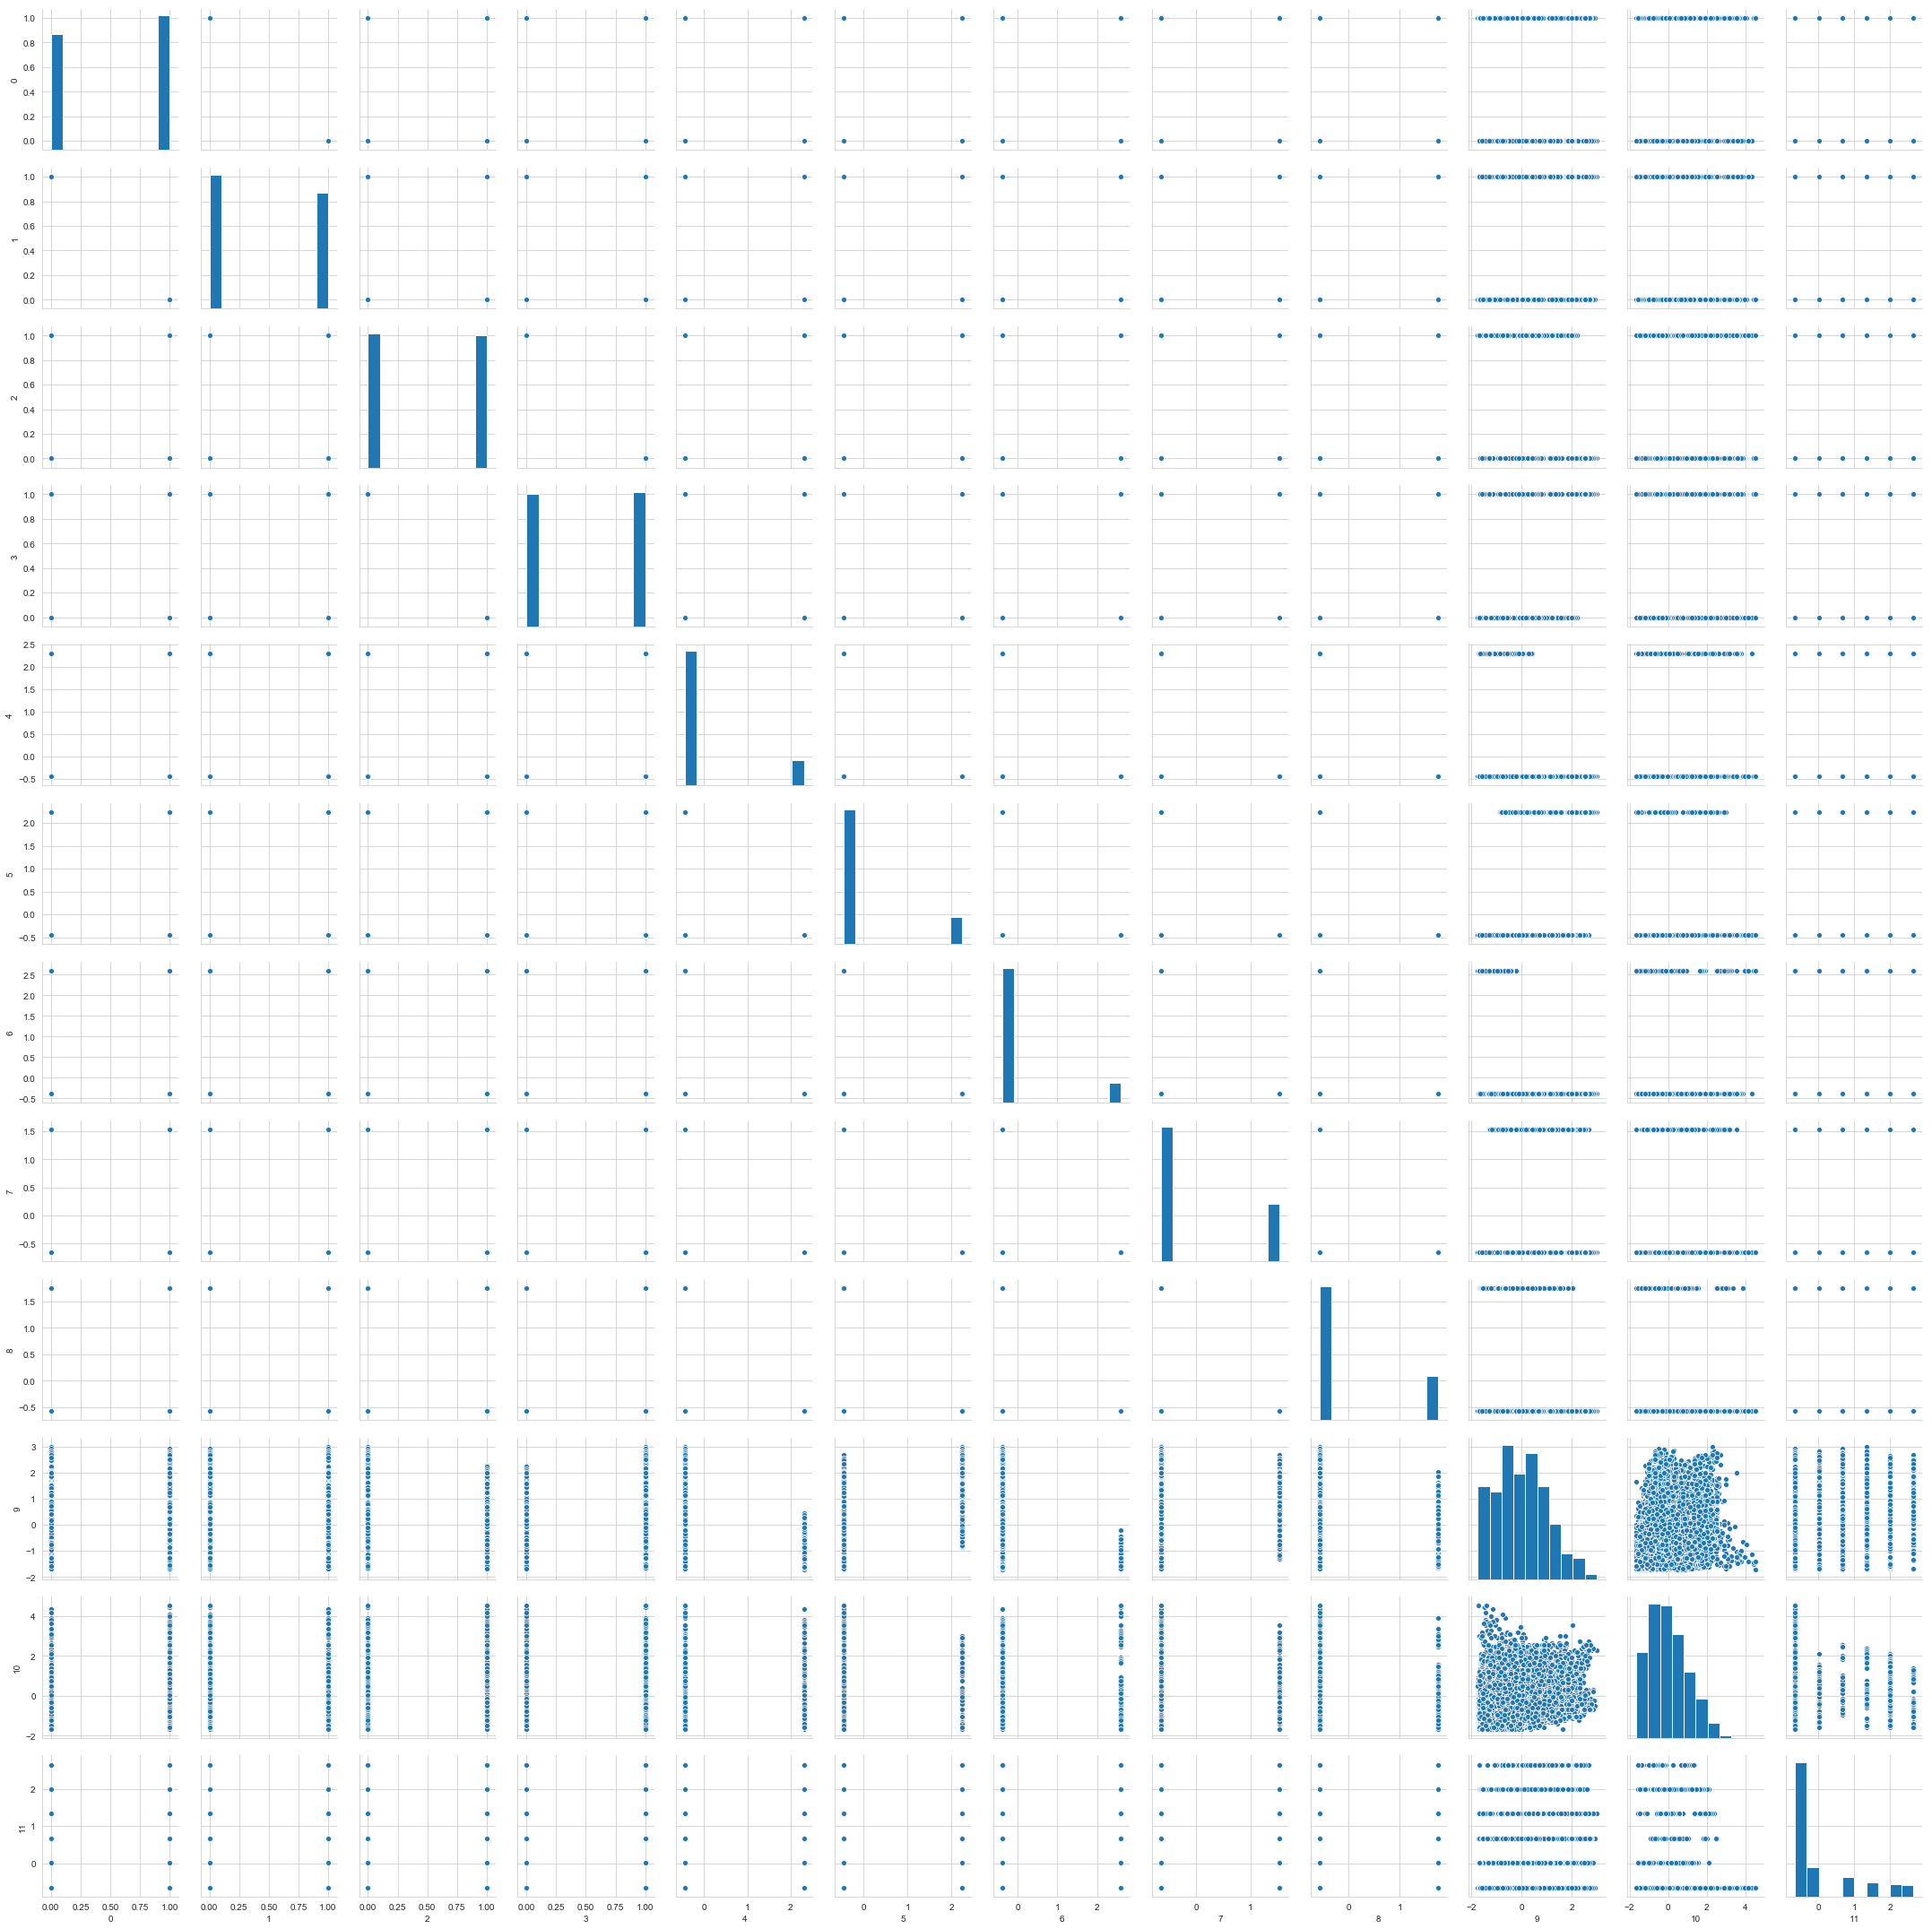

In [77]:
sns.pairplot(pd.DataFrame(X_train))

## PCA

In [78]:
import sklearn.metrics as sklm
import sklearn.decomposition as skde

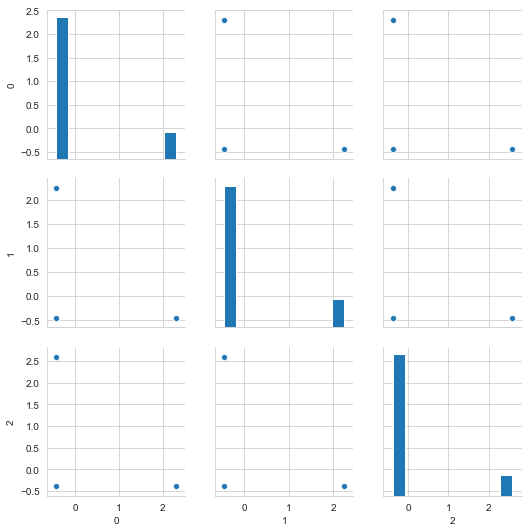

In [79]:
sns.pairplot(pd.DataFrame(X_train[:,4:7]))

In [122]:
pca_model = skde.PCA()
pca_fit = pca_model.fit(X_train[:,:])
print(pca_fit.explained_variance_ratio_)

[2.54715695e-01 1.57335763e-01 1.49449792e-01 1.32261665e-01
 1.03811742e-01 7.82151914e-02 5.83736872e-02 4.69868518e-02
 1.88496127e-02 1.55840093e-31 6.21610125e-33 3.50589136e-34]


In [123]:
def transform_pca(data):
    transformed = pca_fit.transform(data[:,:])
    #transformed = np.concatenate([data[:,0:4], transformed ,data[:,7:]], axis=1)
    print(data.shape)
    print(transformed.shape)
    return transformed    
    

(11483, 12)
(11483, 12)


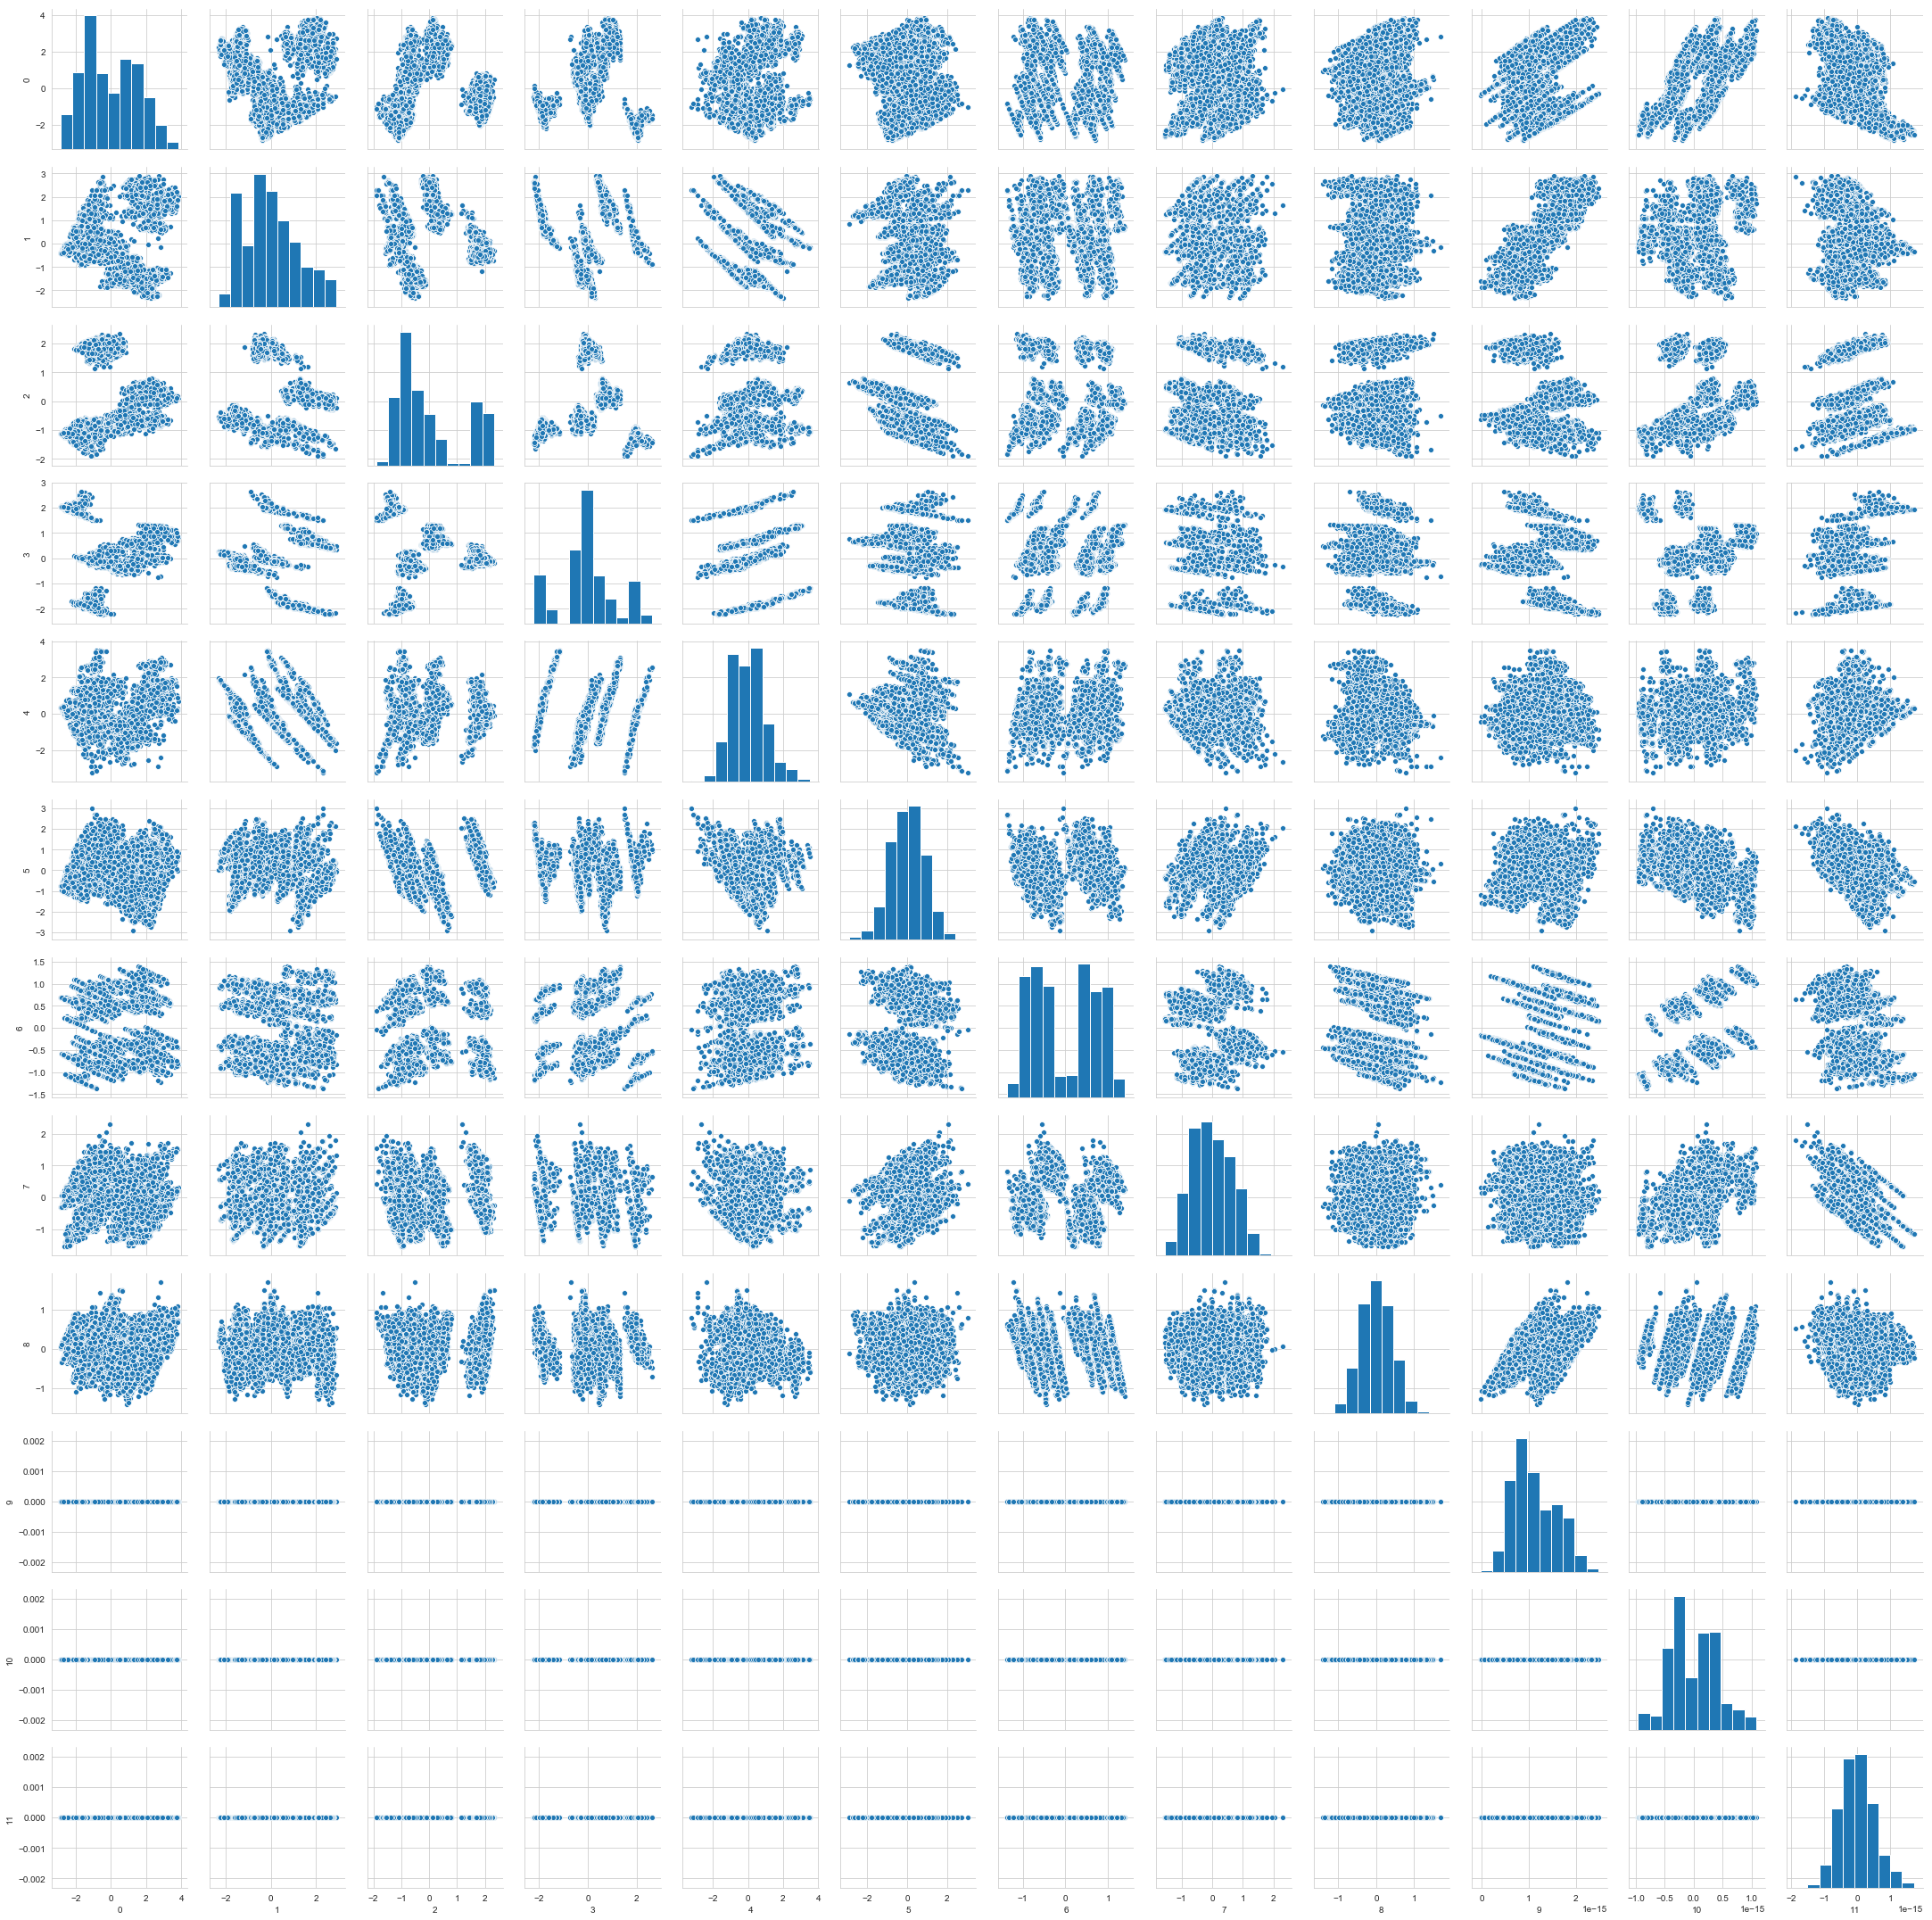

In [124]:
X_train_pca = transform_pca(X_train)
sns.pairplot(pd.DataFrame(X_train_pca))

(4921, 12)
(4921, 12)


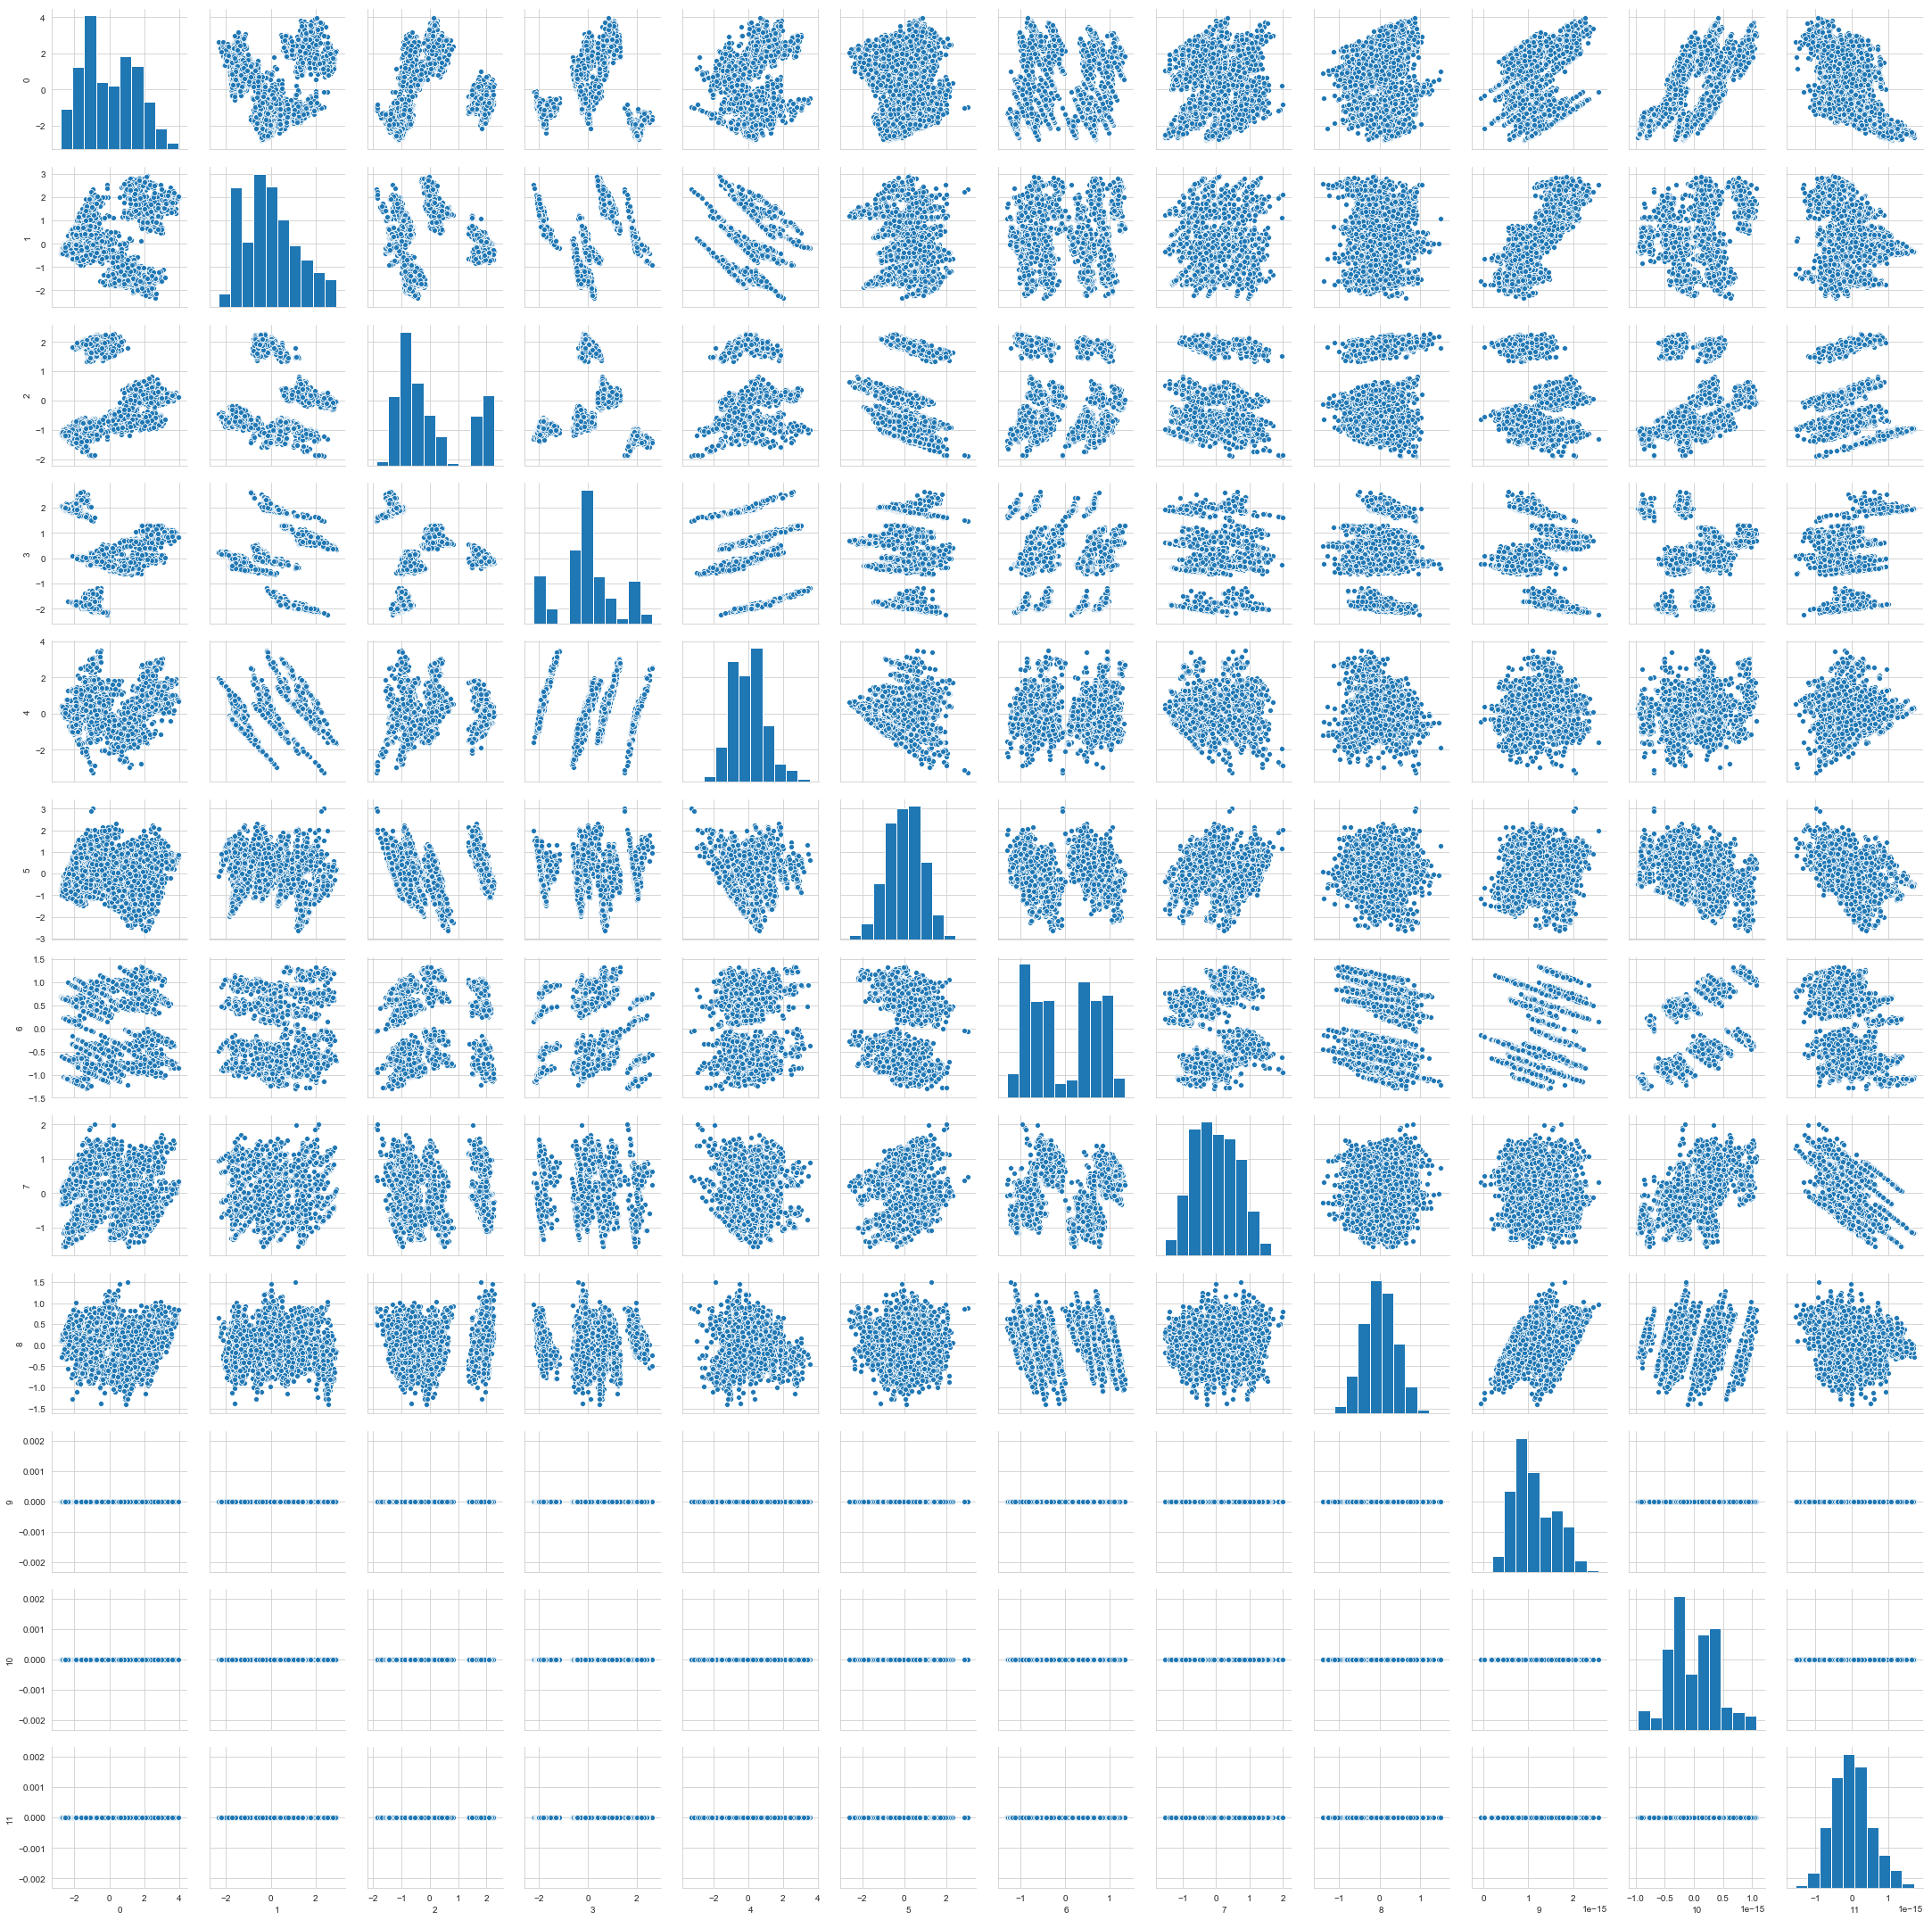

In [125]:
X_test_pca = transform_pca(X_test)
sns.pairplot(pd.DataFrame(X_test_pca))

## Scoring methods

In [131]:
def score_model_lr(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

In [132]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [133]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

## Logistic regression

In [87]:
inside = ms.KFold(n_splits=5, shuffle = True)
outside = ms.KFold(n_splits=5, shuffle = True)

param_grid = {"class_weight":[{0:0.4, 1:0.6},{0:0.45, 1:0.55},{0:0.35, 1:0.65},{0:0.3, 1:0.7}], "C": [70.0,80.0,90.0,100.0,200.0]}

logistic_mod = linear_model.LogisticRegression() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)

clf.fit(X_train, y_train)
print(clf.best_estimator_.class_weight)
print(clf.best_estimator_.C)


{0: 0.35, 1: 0.65}
80.0


In [88]:
lr_model = linear_model.LogisticRegression(class_weight=clf.best_estimator_.class_weight, C=clf.best_estimator_.C)
lr_model.fit(X_train, y_train)

LogisticRegression(C=80.0, class_weight={0: 0.35, 1: 0.65}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [89]:
probabilities = lr_model.predict_proba(X_test)
print(probabilities[:15,:])

[[0.62546311 0.37453689]
 [0.4647422  0.5352578 ]
 [0.4691686  0.5308314 ]
 [0.60906261 0.39093739]
 [0.76410717 0.23589283]
 [0.92485159 0.07514841]
 [0.86358118 0.13641882]
 [0.86710063 0.13289937]
 [0.88951751 0.11048249]
 [0.6253679  0.3746321 ]
 [0.97786495 0.02213505]
 [0.2290092  0.7709908 ]
 [0.65889462 0.34110538]
 [0.54563121 0.45436879]
 [0.66802176 0.33197824]]


In [90]:
scores = score_model(probabilities, 0.50)
print(np.array(scores[:20]))
print(y_test[:20])

[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]


In [91]:
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2621               682
Actual negative       499              1119

Accuracy  0.76
 
           Positive      Negative
Num case     3303          1618
Precision    0.84          0.62
Recall       0.79          0.69
F1           0.82          0.65


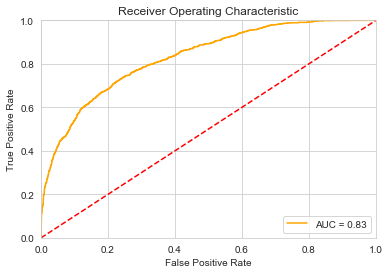

In [92]:
plot_auc(y_test, probabilities)    

## Logistic Regression with PCA

In [126]:
inside = ms.KFold(n_splits=5, shuffle = True)
outside = ms.KFold(n_splits=5, shuffle = True)

param_grid = {"class_weight":[{0:0.4, 1:0.6},{0:0.45, 1:0.55},{0:0.35, 1:0.65},{0:0.3, 1:0.7}], "C": [70.0,80.0,90.0,100.0,200.0]}

logistic_mod = linear_model.LogisticRegression() 

## Perform the grid search over the parameters
clf_pca = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)

clf_pca.fit(X_train_pca, y_train)
print(clf_pca.best_estimator_.class_weight)
print(clf_pca.best_estimator_.C)


{0: 0.3, 1: 0.7}
70.0


In [127]:
lr_model_pca = linear_model.LogisticRegression(class_weight=clf.best_estimator_.class_weight, C=clf.best_estimator_.C)
lr_model_pca.fit(X_train_pca, y_train)

LogisticRegression(C=5, class_weight={0: 0.35, 1: 0.65}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [128]:
probabilities_pca = lr_model.predict_proba(X_test_pca)
print(probabilities_pca[:15,:])

[[0.84501318 0.15498682]
 [0.08196489 0.91803511]
 [0.57826428 0.42173572]
 [0.61555814 0.38444186]
 [0.68309897 0.31690103]
 [0.54232239 0.45767761]
 [0.76164672 0.23835328]
 [0.23131323 0.76868677]
 [0.36628363 0.63371637]
 [0.58108365 0.41891635]
 [0.30544068 0.69455932]
 [0.64064387 0.35935613]
 [0.70693449 0.29306551]
 [0.7324397  0.2675603 ]
 [0.7093223  0.2906777 ]]


In [136]:
scores_pca = score_model_lr(probabilities_pca, 0.5)
print(np.array(scores_pca[:20]))
print(y_test[:20])

[0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]


In [137]:
print_metrics(y_test, scores_pca) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1767              1536
Actual negative      1221               397

Accuracy  0.44
 
           Positive      Negative
Num case     3303          1618
Precision    0.59          0.21
Recall       0.53          0.25
F1           0.56          0.22


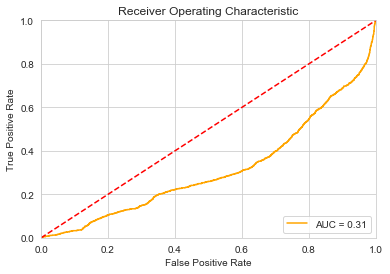

In [138]:
plot_auc(y_test, probabilities_pca)    

In [139]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

In [143]:
thresholds = [0.8,0.75,0.65,0.6, 0.5, 0.3]
for t in thresholds:
    test_threshold(probabilities_pca, y_test, t)


For threshold = 0.8
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2492               811
Actual negative      1417               201

Accuracy  0.55
 
           Positive      Negative
Num case     3303          1618
Precision    0.64          0.20
Recall       0.75          0.12
F1           0.69          0.15

For threshold = 0.75
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2298              1005
Actual negative      1375               243

Accuracy  0.52
 
           Positive      Negative
Num case     3303          1618
Precision    0.63          0.19
Recall       0.70          0.15
F1           0.66          0.17

For threshold = 0.65
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2163              1140
Actual negative      1302               316

Accuracy  0.50
 
           Positive      Negative
Num cas

## Support Vector Machines

In [101]:
from sklearn.svm import LinearSVC, SVC

In [102]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [103]:
svm_pred = svm_model.predict(X_test)

In [104]:
print(svm_pred[:30])
print(y_test[:30])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0]


In [105]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('             Score 0   Score 1')
    print('Actual 0      %6d' % conf[0,0] + '       %5d' % conf[0,1] )
    print('Actual 1      %6d' % conf[1,0] + '       %5d' % conf[1,1] )
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('         Score 0     Score 1 ')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] )
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] )
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] )
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] )

In [106]:
print_metrics_3(y_test, svm_pred)

                 Confusion matrix
             Score 0   Score 1
Actual 0        2980         323
Actual 1         750         868

Accuracy        0.78
 
         Score 0     Score 1 
Num case   3303.00     1618.00
Precision   0.80      0.73
Recall      0.90      0.54
F1          0.85      0.62


In [107]:
inside = ms.KFold(n_splits=5, shuffle = True)
outside = ms.KFold(n_splits=5, shuffle = True)

In [108]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [5, 10, 15], "gamma":[1.0/25], "class_weight":[{0:0.35, 1:0.65}]}
## Define the SVM model
svc_clf = SVC() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(X_train, y_train)
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)
print(clf.best_estimator_.class_weight)

5
0.04
{0: 0.35, 1: 0.65}


In [109]:
cv_estimate = ms.cross_val_score(clf, X_test, y_test, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.841
SDT of the metric       = 0.004
Outcomes by cv fold
Fold  1    0.846
Fold  2    0.840
Fold  3    0.835
Fold  4    0.842
Fold  5    0.840


In [110]:
svm_mod = SVC(C = clf.best_estimator_.C,
                  gamma = clf.best_estimator_.gamma,
                  class_weight = clf.best_estimator_.class_weight,
                  probability=True) 
svm_mod.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight={0: 0.35, 1: 0.65}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.04, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [111]:
svm_pred = svm_mod.predict(X_test)
print_metrics_3(y_test, svm_pred)

                 Confusion matrix
             Score 0   Score 1
Actual 0        2699         604
Actual 1         502        1116

Accuracy        0.78
 
         Score 0     Score 1 
Num case   3303.00     1618.00
Precision   0.84      0.65
Recall      0.82      0.69
F1          0.83      0.67


In [112]:
from sklearn.neural_network import MLPClassifier

In [113]:
param_grid = {#"alpha":[0.0000001,0.000001,0.00001], 
              #"early_stopping":[True, False], 
              "beta_1":[0.95,0.90,0.80], 
              "beta_2":[0.999,0.9,0.8]}

## Define the Neural Network model
nn_clf = MLPClassifier(hidden_layer_sizes = (100,100),
                       max_iter=300)

## Perform the grid search over the parameters
nn_clf = ms.GridSearchCV(estimator = nn_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'recall',
                      return_train_score = True)
nn_clf.fit(X_train, y_train)
#print(nn_clf.best_estimator_.alpha)
#print(nn_clf.best_estimator_.early_stopping)
print(nn_clf.best_estimator_.beta_1)
print(nn_clf.best_estimator_.beta_2)

0.8
0.8


In [114]:
cv_estimate = ms.cross_val_score(nn_clf, X_train, y_train, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.606
SDT of the metric       = 0.024
Outcomes by cv fold
Fold  1    0.582
Fold  2    0.640
Fold  3    0.596
Fold  4    0.584
Fold  5    0.630


In [115]:
nn_mod = MLPClassifier(hidden_layer_sizes = (100,100), 
                       #alpha = nn_clf.best_estimator_.alpha, 
                       #early_stopping = nn_clf.best_estimator_.early_stopping, 
                       beta_1 = nn_clf.best_estimator_.beta_1, 
                       beta_2 = nn_clf.best_estimator_.beta_2,
                       max_iter = 300)
nn_mod.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.8,
       beta_2=0.8, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [166]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('---------------------------------------------------------------------')
    print('Threshold: %0.2f' % threshold)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
 

In [167]:
probabilities_nn = nn_mod.predict_proba(X_test)

In [168]:
thresholds = [0.8,0.75,0.65,0.6, 0.5, 0.3]
for t in thresholds:
    print_metrics(y_test, probabilities_nn, t)  


---------------------------------------------------------------------
Threshold: 0.80
                 Confusion matrix
                 Score positive    Score negative
Actual positive      3259                44
Actual negative      1111               507

Accuracy        0.77
AUC             0.86
Macro precision 0.83
Macro recall    0.65
 
           Positive      Negative
Num case     3303          1618
Precision    0.75          0.92
Recall       0.99          0.31
F1           0.85          0.47
---------------------------------------------------------------------
Threshold: 0.75
                 Confusion matrix
                 Score positive    Score negative
Actual positive      3233                70
Actual negative      1041               577

Accuracy        0.77
AUC             0.86
Macro precision 0.82
Macro recall    0.67
 
           Positive      Negative
Num case     3303          1618
Precision    0.76          0.89
Recall       0.98          0.36
F1           0.85 

In [169]:
scores_nn = score_model(probabilities_nn, 0.5)
print(np.array(scores_nn[:20]))
print(y_test[:20])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]


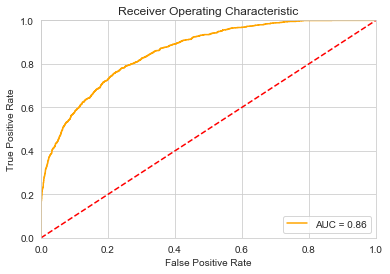

In [170]:
plot_auc(y_test, probabilities_nn)

In [117]:
df_aw_test = pd.read_csv('./AW_test.csv')

df_aw_test.head()

df_aw_test.set_index("CustomerID", inplace=True)

process_age(df_aw_test)

df_aw_test.head()

enc_cols = ['MaritalStatus', 'Gender', 'Occupation']
no_enc_cols = ["YearlyIncome", "Age", "NumberChildrenAtHome"]
test_features = build_features_array(df_aw_test, enc_cols, no_enc_cols)

test_features[:,4:] = scaler.transform(test_features[:,4:])

prob_test = nn_mod.predict_proba(test_features)

scores_test = score_model(prob_test, .5)

scores_test

In [182]:
df_aw_test["BikeBuyer"] = scores_test

In [184]:
df_aw_test[["BikeBuyer"]].head()


BikeBuyer
CustomerID           
18988               0
29135               1
12156               0
13749               0
27780               0

In [185]:
df_aw_test[["BikeBuyer"]].to_csv("results_class.csv")